In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [2]:

raw_dataset = pd.read_csv('Dallas data summary backfiled(6M).csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.tail(20)

Date  House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
146   5/1/2017                            180.64196                     4.01   
147   6/1/2017                            180.78713                     3.90   
148   7/1/2017                            181.23406                     3.97   
149   8/1/2017                            182.28582                     3.88   
150   9/1/2017                            183.58835                     3.81   
151  10/1/2017                            185.27276                     3.90   
152  11/1/2017                            186.42279                     3.92   
153  12/1/2017                            187.15900                     3.95   
154   1/1/2018                            187.50014                     4.03   
155   2/1/2018                            187.43342                     4.33   
156   3/1/2018                            187.42928                     4.44   
157   4/1/2018                            187.49068                     4.47   
158   5/1/2018                            187.88942                     4.59   
159   6/1/2018                            187.97905                     4.57   
160   7/1/2018                            188.20045                     4.53   
161   8/1/2018                            188.53544                     4.55   
162   9/1/2018                            189.08054                     4.63   
163  10/1/2018                            190.31511                     4.83   
164  11/1/2018                            191.29702                     4.87   
165  12/1/2018                            192.12944                     4.64   

     Personal_Income  Resident_Population  Unemployment_Rate         GDP  \
146            56864             7455.756                3.6  505768.515   
147            56864             7455.756                3.9  505768.515   
148            56864             7455.756                3.9  505768.515   
149            56864             7455.756                3.9  505768.515   
150            56864             7455.756                3.5  505768.515   
151            56864             7455.756                3.3  505768.515   
152            56864             7455.756                3.4  505768.515   
153            56864             7455.756                3.3  505768.515   
154            56864             7455.756                3.7  505768.515   
155            58725             7573.136                3.7  523861.973   
156            58725             7573.136                3.6  523861.973   
157            58725             7573.136                3.3  523861.973   
158            58725             7573.136                3.3  523861.973   
159            58725             7573.136                3.9  523861.973   
160            58725             7573.136                3.7  523861.973   
161            58725             7573.136                3.6  523861.973   
162            58725             7573.136                3.4  523861.973   
163            58725             7573.136                3.3  523861.973   
164            58725             7573.136                3.2  523861.973   
165            58725             7573.136                3.3  523861.973   

     Crime_Rate Percent_With_Mortgage_Debt  Median_Debt  \
146    774.6436                     35.10%       140633   
147    774.6436                     35.10%       140633   
148    774.6436                     34.70%       142486   
149    774.6436                     34.70%       142486   
150    774.6436                     34.70%       142486   
151    774.6436                     34.50%       144208   
152    774.6436                     34.50%       144208   
153    774.6436                     34.50%       144208   
154    764.9371                     34.70%       145761   
155    764.9371                     34.70%       145761   
156    764.9371                     34.70%       145761   
157    764.9371         

In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

Date  House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
0  3/1/2005                            121.62157                     5.93   
1  4/1/2005                            121.66380                     5.86   
2  5/1/2005                            122.11284                     5.72   
3  6/1/2005                            122.20399                     5.58   
4  7/1/2005                            121.91083                     5.70   

   Personal_Income  Resident_Population  Unemployment_Rate         GDP  \
0            37170             5816.407                5.3  284456.508   
1            39903             5999.411                5.1  307562.122   
2            39903             5999.411                5.1  307562.122   
3            39903             5999.411                5.4  307562.122   
4            39903             5999.411                5.4  307562.122   

   Crime_Rate  Median_Debt  New_Structures  Economic_Conditions_Index  \
0   1254.0813       133706            4281                       4.19   
1   1254.0813       134186            5548                       4.69   
2   1254.0813       134186            4878                       4.58   
3   1254.0813       134186            5304                       4.83   
4   1254.0813       134032            5140                       5.06   

   CPI all items less shelter  Percent_With_Mortgage_Debt  \
0                       188.9                        43.2   
1                       196.6                        43.4   
2                       196.6                        43.4   
3                       196.6                        43.4   
4                       196.6                        43.4   

   Percent_With_Severely_Delinquent_Debt  
0                                    2.3  
1                                    2.3  
2                                    2.3  
3                                    2.3  
4                                    2.3

In [4]:
features.isna().sum()

Date                                     0
House_Price_Index(S&P/Case-Shiller)      0
Mortgage_Rate (30 yers)                  0
Personal_Income                          0
Resident_Population                      0
Unemployment_Rate                        0
GDP                                      0
Crime_Rate                               0
Median_Debt                              0
New_Structures                           0
Economic_Conditions_Index                0
CPI all items less shelter               0
Percent_With_Mortgage_Debt               0
Percent_With_Severely_Delinquent_Debt    0
dtype: int64

In [5]:
features=features.drop('Date',axis=1)
train_dataset = features.iloc[:154]
test_dataset = features.iloc[154:]

In [6]:
train_dataset

House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
0                              121.62157                     5.93   
1                              121.66380                     5.86   
2                              122.11284                     5.72   
3                              122.20399                     5.58   
4                              121.91083                     5.70   
..                                   ...                      ...   
149                            182.28582                     3.88   
150                            183.58835                     3.81   
151                            185.27276                     3.90   
152                            186.42279                     3.92   
153                            187.15900                     3.95   

     Personal_Income  Resident_Population  Unemployment_Rate         GDP  \
0              37170             5816.407                5.3  284456.508   
1              39903             5999.411                5.1  307562.122   
2              39903             5999.411                5.1  307562.122   
3              39903             5999.411                5.4  307562.122   
4              39903             5999.411                5.4  307562.122   
..               ...                  ...                ...         ...   
149            56864             7455.756                3.9  505768.515   
150            56864             7455.756                3.5  505768.515   
151            56864             7455.756                3.3  505768.515   
152            56864             7455.756                3.4  505768.515   
153            56864             7455.756                3.3  505768.515   

     Crime_Rate  Median_Debt  New_Structures  Economic_Conditions_Index  \
0     1254.0813       133706            4281                       4.19   
1     1254.0813       134186            5548                       4.69   
2     1254.0813       134186            4878                       4.58   
3     1254.0813       134186            5304                       4.83   
4     1254.0813       134032            5140                       5.06   
..          ...          ...             ...                        ...   
149    774.6436       142486            6620                       3.91   
150    774.6436       142486            4446                       4.15   
151    774.6436       144208            6459                       4.03   
152    774.6436       144208            3754                       3.73   
153    774.6436       144208            3631                       3.54   

     CPI all items less shelter  Percent_With_Mortgage_Debt  \
0                       188.900                        43.2   
1                       196.600                        43.4   
2                       196.600                        43.4   
3                       196.600                        43.4   
4                       196.600                        43.4   
..                          ...                         ...   
149                     225.753                        34.7   
150                     225.753                        34.7   
151                     225.753                        34.5   
152                     225.753                        34.5   
153                     225.753                        34.5   

     Percent_With_Severely_Delinquent_Debt  
0                                      2.3  
1                                      2.3  
2                                      2.3  
3                                      2.3  
4                                      2.3  
..                                     ...  
149                                    1.2  
150                                    1.2  
151                                    1.4  
152                                    1.4  
153                                    1.4  

[154 rows x 13 columns]

In [7]:
train_stats = train_dataset.describe()
train_stats.pop('House_Price_Index(S&P/Case-Shiller)')
train_stats = train_stats.transpose()
train_stats

count           mean            std  \
Mortgage_Rate (30 yers)                154.0       4.769286       1.037777   
Personal_Income                        154.0   46623.922078    5353.954117   
Resident_Population                    154.0    6700.461175     438.933181   
Unemployment_Rate                      154.0       5.522078       1.552070   
GDP                                    154.0  483064.876838  359241.068443   
Crime_Rate                             154.0     827.867606     197.670919   
Median_Debt                            154.0  133590.344156    3943.704187   
New_Structures                         154.0    3387.207792    1389.015967   
Economic_Conditions_Index              154.0       3.324026       2.089403   
CPI all items less shelter             154.0     215.194461       9.368599   
Percent_With_Mortgage_Debt             154.0      40.340260       3.187876   
Percent_With_Severely_Delinquent_Debt  154.0       2.829870       0.992200   

                                               min          25%          50%  \
Mortgage_Rate (30 yers)                     3.3500       3.9125       4.4300   
Personal_Income                         37170.0000   41319.0000   46644.0000   
Resident_Population                      5816.4070    6392.0650    6644.5590   
Unemployment_Rate                           3.3000       4.1000       5.1500   
GDP                                    284456.5080  336217.2700  374743.3120   
Crime_Rate                                663.7371     681.1003     762.4122   
Median_Debt                            127063.0000  130171.7500  134355.0000   
New_Structures                           1098.0000    2245.7500    3325.5000   
Economic_Conditions_Index                  -4.4600       3.5300       4.0100   
CPI all items less shelter                188.9000     209.4070     219.7360   
Percent_With_Mortgage_Debt                 34.5000      37.2750      41.7000   
Percent_With_Severely_Delinquent_Debt       1.2000       2.3000       2.6000   

                                               75%           max  
Mortgage_Rate (30 yers)                     5.8500  6.760000e+00  
Personal_Income                         50670.0000  5.686400e+04  
Resident_Population                      7042.5660  7.455756e+03  
Unemployment_Rate                           6.7750  8.700000e+00  
GDP                                    435857.5220  1.699894e+06  
Crime_Rate                                894.8343  1.254081e+03  
Median_Debt                            136181.0000  1.442080e+05  
New_Structures                           4372.2500  7.374000e+03  
Economic_Conditions_Index                   4.4050  5.220000e+00  
CPI all items less shelter                221.2480  2.257530e+02  
Percent_With_Mortgage_Debt                 43.2000  4.410000e+01  
Percent_With_Severely_Delinquent_Debt       3.8500  4.800000e+00

In [8]:
train_labels = train_dataset.pop('House_Price_Index(S&P/Case-Shiller)')
test_labels = test_dataset.pop('House_Price_Index(S&P/Case-Shiller)')

In [9]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head(20)

Mortgage_Rate (30 yers)  Personal_Income  Resident_Population  \
0                  1.118462        -1.765783            -2.014097   
1                  1.051011        -1.255319            -1.597168   
2                  0.916107        -1.255319            -1.597168   
3                  0.781203        -1.255319            -1.597168   
4                  0.896835        -1.255319            -1.597168   
5                  1.012467        -1.255319            -1.597168   
6                  0.964287        -1.255319            -1.597168   
7                  1.253366        -1.255319            -1.597168   
8                  1.503902        -1.255319            -1.597168   
9                  1.446086        -1.255319            -1.597168   
10                 1.330454        -1.255319            -1.597168   
11                 1.426814        -0.990842            -1.238934   
12                 1.494266        -0.990842            -1.238934   
13                 1.677350        -0.990842            -1.238934   
14                 1.764073        -0.990842            -1.238934   
15                 1.841161        -0.990842            -1.238934   
16                 1.918249        -0.990842            -1.238934   
17                 1.686985        -0.990842            -1.238934   
18                 1.571354        -0.990842            -1.238934   
19                 1.532810        -0.990842            -1.238934   

    Unemployment_Rate       GDP  Crime_Rate  Median_Debt  New_Structures  \
0           -0.143085 -0.552855    2.156178     0.029327        0.643472   
1           -0.271945 -0.488538    2.156178     0.151040        1.555628   
2           -0.271945 -0.488538    2.156178     0.151040        1.073272   
3           -0.078655 -0.488538    2.156178     0.151040        1.379964   
4           -0.078655 -0.488538    2.156178     0.111990        1.261895   
5           -0.207515 -0.488538    2.156178     0.111990        1.911276   
6           -0.271945 -0.488538    2.156178     0.111990        0.701066   
7           -0.465235 -0.488538    2.156178     0.240549        1.027196   
8           -0.336375 -0.488538    2.156178     0.240549        0.954483   
9           -0.465235 -0.488538    2.156178     0.240549        1.490834   
10          -0.271945 -0.488538    1.914735     0.616592        0.537641   
11          -0.271945 -0.434466    1.914735     0.616592        0.757941   
12          -0.465235 -0.434466    1.914735     0.616592        1.899757   
13          -0.529666 -0.434466    1.914735     0.322452        1.048074   
14          -0.465235 -0.434466    1.914735     0.322452        1.385004   
15          -0.207515 -0.434466    1.914735     0.322452        2.870228   
16          -0.207515 -0.434466    1.914735     0.559285        1.166864   
17          -0.465235 -0.434466    1.914735     0.559285        0.999119   
18          -0.529666 -0.434466    1.914735     0.559285        0.582997   
19          -0.787386 -0.434466    1.914735     0.984013        0.153196   

    Economic_Conditions_Index  CPI all items less shelter  \
0                    0.414460                   -2.806659   
1                    0.653763                   -1.984764   
2                    0.601116                   -1.984764   
3                    0.720768                   -1.984764   
4                    0.830847                   -1.984764   
5                    0.495823                   -1.984764   
6                    0.510181                   -1.984764   
7                    0.538897                   -1.984764   
8                    0.486251                   -1.984764   
9                    0.476679                   -1.984764   
10                   0.495823                   -1.984764   
11                   0.409674                   -1.625906   
12                   0.438390                   -1.625906   
13                   0.471893                   -1.625906   
14                   0.562828             

In [10]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [11]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [12]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[0.49598694],
       [0.61487186],
       [0.51187384],
       [0.52922314],
       [0.5174274 ],
       [0.66528153],
       [0.4425621 ],
       [0.57921827],
       [0.55265856],
       [0.67853534]], dtype=float32)

In [13]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 400

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

KeyError: 'val_mae'

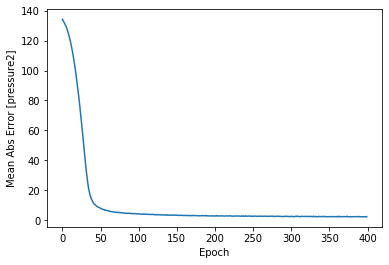

In [14]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [pressure2]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [pressure2^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()
  plt.show()


plot_history(history)

Mean Absolute Error: 16.25
Accuracy: 91.41 %.


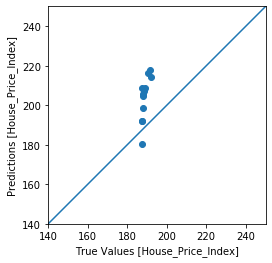

In [15]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

test_errors = abs(test_predictions - test_labels)


print('Mean Absolute Error:', round(np.mean(test_errors), 2))

mape = np.mean(100 * (test_errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 2.23
Accuracy: 98.32 %.


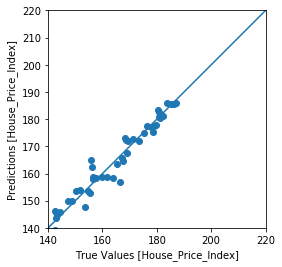

In [16]:
train_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_errors = abs(train_predictions - train_labels)


print('Mean Absolute Error:', round(np.mean(train_errors), 2))

mape = np.mean(100 * (train_errors / train_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [17]:
prediction_features=features   #produce prediction result
prediction_features

House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
0                              121.62157                     5.93   
1                              121.66380                     5.86   
2                              122.11284                     5.72   
3                              122.20399                     5.58   
4                              121.91083                     5.70   
..                                   ...                      ...   
161                            188.53544                     4.55   
162                            189.08054                     4.63   
163                            190.31511                     4.83   
164                            191.29702                     4.87   
165                            192.12944                     4.64   

     Personal_Income  Resident_Population  Unemployment_Rate         GDP  \
0              37170             5816.407                5.3  284456.508   
1              39903             5999.411                5.1  307562.122   
2              39903             5999.411                5.1  307562.122   
3              39903             5999.411                5.4  307562.122   
4              39903             5999.411                5.4  307562.122   
..               ...                  ...                ...         ...   
161            58725             7573.136                3.6  523861.973   
162            58725             7573.136                3.4  523861.973   
163            58725             7573.136                3.3  523861.973   
164            58725             7573.136                3.2  523861.973   
165            58725             7573.136                3.3  523861.973   

     Crime_Rate  Median_Debt  New_Structures  Economic_Conditions_Index  \
0     1254.0813       133706            4281                       4.19   
1     1254.0813       134186            5548                       4.69   
2     1254.0813       134186            4878                       4.58   
3     1254.0813       134186            5304                       4.83   
4     1254.0813       134032            5140                       5.06   
..          ...          ...             ...                        ...   
161    764.9371       150174            5416                       4.18   
162    764.9371       150174            4336                       4.02   
163    764.9371       151486            4505                       4.09   
164    764.9371       151486            4920                       4.05   
165    764.9371       151486            4099                       3.93   

     CPI all items less shelter  Percent_With_Mortgage_Debt  \
0                       188.900                        43.2   
1                       196.600                        43.4   
2                       196.600                        43.4   
3                       196.600                        43.4   
4                       196.600                        43.4   
..                          ...                         ...   
161                     228.881                        34.4   
162                     228.881                        34.4   
163                     228.881                        34.0   
164                     228.881                        34.0   
165                     228.881                        34.0   

     Percent_With_Severely_Delinquent_Debt  
0                                      2.3  
1                                      2.3  
2                                      2.3  
3                                      2.3  
4                                      2.3  
..                                     ...  
161                                    1.1  
162                                    1.1  
163                                    1.1  
164                                    1.1  
165                                    1.1  

[166 rows x 13 columns]

In [18]:
prediction_features.pop('House_Price_Index(S&P/Case-Shiller)')
normed_prediction_features=norm(prediction_features)
prediction_result=model.predict(normed_prediction_features)
prediction_result=pd.DataFrame(prediction_result)
rawdataset=raw_dataset.join(prediction_result)
rawdataset                              

Date  House_Price_Index(S&P/Case-Shiller)  Mortgage_Rate (30 yers)  \
0     3/1/2005                            121.62157                     5.93   
1     4/1/2005                            121.66380                     5.86   
2     5/1/2005                            122.11284                     5.72   
3     6/1/2005                            122.20399                     5.58   
4     7/1/2005                            121.91083                     5.70   
..         ...                                  ...                      ...   
161   8/1/2018                            188.53544                     4.55   
162   9/1/2018                            189.08054                     4.63   
163  10/1/2018                            190.31511                     4.83   
164  11/1/2018                            191.29702                     4.87   
165  12/1/2018                            192.12944                     4.64   

     Personal_Income  Resident_Population  Unemployment_Rate         GDP  \
0              37170             5816.407                5.3  284456.508   
1              39903             5999.411                5.1  307562.122   
2              39903             5999.411                5.1  307562.122   
3              39903             5999.411                5.4  307562.122   
4              39903             5999.411                5.4  307562.122   
..               ...                  ...                ...         ...   
161            58725             7573.136                3.6  523861.973   
162            58725             7573.136                3.4  523861.973   
163            58725             7573.136                3.3  523861.973   
164            58725             7573.136                3.2  523861.973   
165            58725             7573.136                3.3  523861.973   

     Crime_Rate Percent_With_Mortgage_Debt  Median_Debt  \
0     1254.0813                     43.20%       133706   
1     1254.0813                     43.40%       134186   
2     1254.0813                     43.40%       134186   
3     1254.0813                     43.40%       134186   
4     1254.0813                     43.40%       134032   
..          ...                        ...          ...   
161    764.9371                     34.40%       150174   
162    764.9371                     34.40%       150174   
163    764.9371                     34.00%       151486   
164    764.9371                     34.00%       151486   
165    764.9371                     34.00%       151486   

    Percent_With_Severely_Delinquent_Debt  New_Structures  \
0                                   2.30%            4281   
1                                   2.30%            5548   
2                                   2.30%            4878   
3                                   2.30%            5304   
4                                   2.30%            5140   
..                                    ...             ...   
161                                 1.10%            5416   
162                                 1.10%            4336   
163                                 1.10%            4505   
164                                 1.10%            4920   
165                                 1.10%            4099   

     Economic_Conditions_Index  CPI all items less shelter           0  
0                         4.19                     188.900  128.030991  
1                         4.69                     196.600  123.100754  
2                         4.58                     196.600  119.720688  
3                         4.83                     196.600  118.631119  
4                         5.06                     196.600  119.317940  
..                         ...                         ...         ...  
161                       4.18                     228.881  207.103622  
162                       4.02                     228.881  208.582703  
163                       4.09       

In [19]:
rawdataset.to_csv('prediction-result.csv',index = False, header=True)